# Trabajo Practico 1

Descargamos las librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import io

In [6]:
os.chdir("/Users/matildecuenya/Library/Mobile Documents/com~apple~CloudDocs/Downloads/U. San Andres/2025/SEGUNDO CUATRIMESTRE/Ciencia de datos/TP 1")

# PARTE 1: Familiarizandonos con la base EPH y limpieza

Cargamos las bases, elegimos la region PAMPEANA y las unimos

In [7]:
# === 1. Cargar las bases ===
df_2005 = pd.read_stata("Individual_t105.dta")
df_2025 = pd.read_excel("usu_individual_T125.xlsx")

In [8]:
# === 2. Homogeneizar nombres de columnas ===
df_2005.columns = df_2005.columns.str.upper()
df_2025.columns = df_2025.columns.str.upper()

df_2025["REGION"] = df_2025["REGION"].replace({43: "Pampeana"})

In [9]:
# === 3. Filtrar solo Región Pampeana ===
df_2005_pampeana = df_2005[df_2005["REGION"] == "Pampeana"].copy()
df_2025_pampeana = df_2025[df_2025["REGION"] == "Pampeana"].copy()

In [10]:
# === 4. Agregar variable de año ===
df_2005_pampeana["ANO4"] = 2005
df_2025_pampeana["ANO4"] = 2025

In [11]:
# === 5. Unir en una sola base ===
df_final = pd.concat([df_2005_pampeana, df_2025_pampeana], ignore_index=True)
df_final

,CODUSU,NRO_HOGAR,COMPONENTE,H15,ANO4,TRIMESTRE,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,125082,1.0,1.0,Sí,2005,1er. Trimestre,Pampeana,S,Gran La Plata,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125082,1.0,2.0,Sí,2005,1er. Trimestre,Pampeana,S,Gran La Plata,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125082,1.0,3.0,0.0,2005,1er. Trimestre,Pampeana,S,Gran La Plata,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125283,1.0,1.0,Sí,2005,1er. Trimestre,Pampeana,S,Gran La Plata,283.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125283,1.0,2.0,Sí,2005,1er. Trimestre,Pampeana,S,Gran La Plata,283.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,TQRMNOPWQHLMKUCDEGJBF00852927,1.0,4,1,2025,1,Pampeana,S,13,773.0,...,0.0,0.0,0.0,0.0,8.0,8.0,8.0,NaN,8.0,8.0
28450,TQRMNOPWQHLMKUCDEGJBF00852927,1.0,5,0,2025,1,Pampeana,S,13,773.0,...,0.0,0.0,0.0,0.0,8.0,8.0,8.0,NaN,8.0,8.0
28451,TQRMNOSSVHLMLMCDEGJBF00852929,1.0,1,1,2025,1,Pampeana,S,13,719.0,...,0.0,0.0,0.0,0.0,10.0,10.0,10.0,NaN,10.0,10.0
28452,TQRMNOSSXHLMLMCDEGJBF00858297,2.0,1,1,2025,1,Pampeana,S,13,519.0,...,0.0,0.0,0.0,0.0,10.0,10.0,10.0,NaN,10.0,10.0


Elegimos las variables de interes, remplazamos los datos faltantes por Nan para ambos años y hacemos el heatmap

In [40]:
# --- 6. Variables de interés ---
# Lista completa de variables que deben estar en ambas bases
variables_interes = [
    "CH04", "CH06", "CH07", "CH08", "NIVEL_ED",
    "ESTADO", "CAT_INAC", "IPCF",
    "PONDERA", "AGLOMERADO", "REGION",
    "ITF", "PP04G", "CH12", "CODUSU"
]

In [41]:
# === 7. Unir las bases asegurando que todas las columnas de interés existan ===
# Asegurar que todas las variables de interés estén en ambas bases de datos
for col in variables_interes:
    if col not in df_2005.columns:
        df_2005[col] = np.nan
    if col not in df_2025.columns:
        df_2025[col] = np.nan

In [14]:
# --- 8. Seleccionar solo variables de interés + ANO4 ---
cols_existentes = [v for v in variables_interes if v in df_final.columns]
df_vars = df_final[cols_existentes + ["ANO4"]].copy()

cols_existentes
df_vars

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PONDERA,AGLOMERADO,REGION,CH10,CH09,ITF,PP04G,CH12,CODUSU,ANO4
0,Varón,28.0,Casado,No paga ni le descuentan,Primaria Completa,Ocupado,0.0,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Primario,125082,2005
1,Mujer,30.0,Casado,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,0.0,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Terciario,125082,2005
2,Varón,4.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,280.0,377.0,Gran La Plata,Pampeana,"Sí, asiste",No,840.0,0.0,Jardín/Preescolar,125082,2005
3,Varón,66.0,Casado,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,0.0,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En vehículo para transporte de personas y merc...,Secundario,125283,2005
4,Mujer,60.0,Casado,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,0.0,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En un local/oficina/establecimiento/negocio/ta...,Secundario,125283,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,1,13,5,1.0,3,3,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3,TQRMNOPWQHLMKUCDEGJBF00852927,2025
28450,1,9,5,1.0,1,4,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3,TQRMNOPWQHLMKUCDEGJBF00852927,2025
28451,1,24,5,1.0,5,1,0,1700000.0,719.0,13,Pampeana,1,1,1700000.0,11.0,7,TQRMNOSSVHLMLMCDEGJBF00852929,2025
28452,2,41,3,1.0,4,1,0,1600000.0,519.0,13,Pampeana,2,1,4800000.0,8.0,5,TQRMNOSSXHLMLMCDEGJBF00858297,2025


In [42]:
# Forzar a object (texto) todas las columnas de interés
df_vars[cols_existentes] = df_vars[cols_existentes].astype("object")

# --- 9. Remplazar ceros y stings por NaN ---
mask_2005 = df_vars["ANO4"] == 2005
df_vars.loc[mask_2005, cols_existentes] = df_vars.loc[mask_2005, cols_existentes].replace([0, 0.0, "0,0", "0", "Ns/Nr"], np.nan)

mask_2025 = df_vars["ANO4"] == 2025
df_vars.loc[mask_2025, cols_existentes] = df_vars.loc[mask_2025, cols_existentes].replace(["", " ", "Ns/Nr", 9, 99], np.nan)


/var/folders/hr/svz3x36x7d59_8fxxvxg3p9c0000gn/T/ipykernel_42160/616688884.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vars.loc[mask_2005, cols_existentes] = df_vars.loc[mask_2005, cols_existentes].replace([0, 0.0, "0,0", "0", "Ns/Nr"], np.nan)
/var/folders/hr/svz3x36x7d59_8fxxvxg3p9c0000gn/T/ipykernel_42160/616688884.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_vars.loc[mask_2025, cols_existentes] = df_vars.loc[mask_2025, cols_existentes].replace(["", " ", "Ns/Nr", 9, 99], np.nan)


In [43]:
# --- 10. Crear tablas de valores faltantes ---
faltantes_2005 = df_vars[df_vars["ANO4"] == 2005][cols_existentes].isna().sum()
faltantes_2025 = df_vars[df_vars["ANO4"] == 2025][cols_existentes].isna().sum()

# Mostrar tablas en pantalla
print("Valores faltantes en 2005:")
print(faltantes_2005)
print("\nValores faltantes en 2025:")
print(faltantes_2025)

Valores faltantes en 2005:
CH04             0
CH06             0
CH07             0
CH08             0
NIVEL_ED         0
ESTADO           0
CAT_INAC      6514
IPCF           170
PONDERA          0
AGLOMERADO       0
REGION           0
CH10           412
CH09             0
ITF            170
PP04G         9343
CH12          1019
CODUSU           0
dtype: int64

Valores faltantes en 2025:
CH04             0
CH06           201
CH07             0
CH08             8
NIVEL_ED         0
ESTADO           0
CAT_INAC         0
IPCF             0
PONDERA         63
AGLOMERADO       0
REGION           0
CH10             0
CH09             0
ITF              0
PP04G         7950
CH12            79
CODUSU           0
dtype: int64


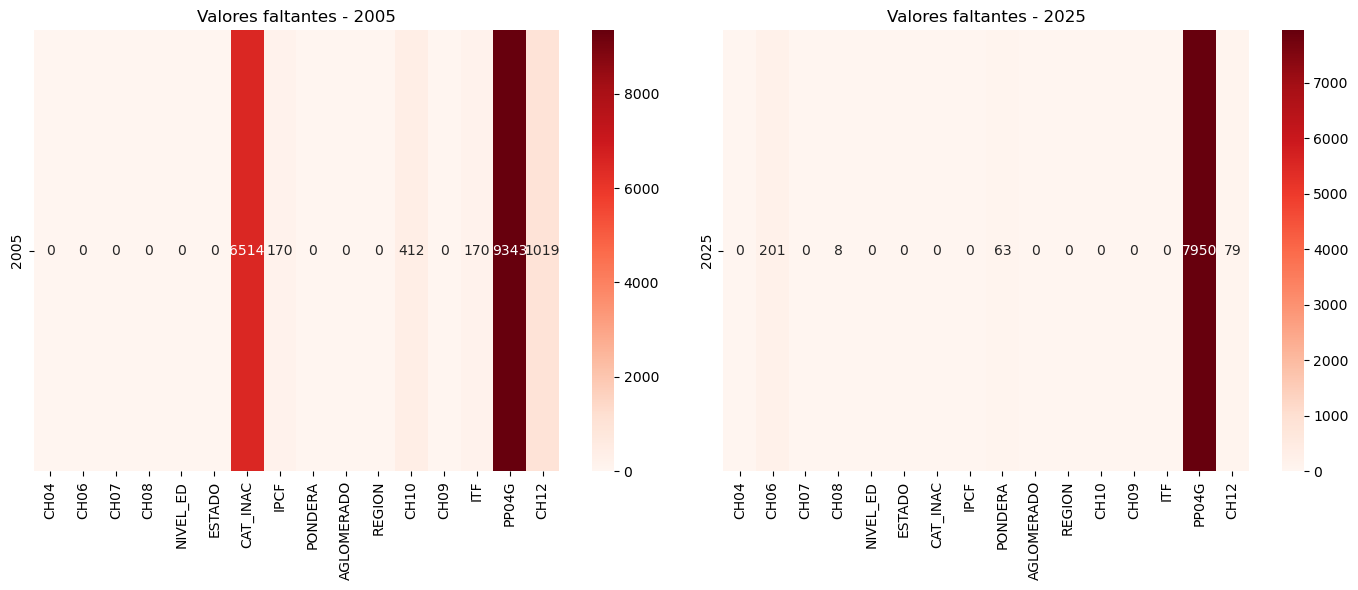

In [15]:
# --- 11. Graficar heatmap ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap([faltantes_2005.values], annot=True, fmt="d",
            xticklabels=faltantes_2005.index, yticklabels=["2005"], cmap="Reds", ax=axes[0])
axes[0].set_title("Valores faltantes - 2005")

sns.heatmap([faltantes_2025.values], annot=True, fmt="d",
            xticklabels=faltantes_2025.index, yticklabels=["2025"], cmap="Reds", ax=axes[1])
axes[1].set_title("Valores faltantes - 2025")

plt.tight_layout()
plt.show()

Estadistica Descriptiva para identificar los datos atipicos, hacemos estadistica descriptiva

In [45]:
import re, unicodedata
import numpy as np
import pandas as pd

def _norm_str(s):
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    s = re.sub(r'[\.\,;/_]+', ' ', s)
    s = re.sub(r'\s+', ' ', s)
    return s

def mapear_CH07(x):
    """Devuelve 1..5 según cuestionario:
       1=Unido, 2=Casado, 3=Separado/Divorciado, 4=Viudo, 5=Soltero"""
    if pd.isna(x):
        return pd.NA
    xs = _norm_str(x)

    # si ya viene como dígito 1..5
    m = re.fullmatch(r'[1-5]', xs)
    if m:
        return int(xs)

    unidos    = {'unido','en union','union','conviviente','en pareja','cohabitante','concubino','concubina'}
    casados   = {'casado','casada','matrimonio'}
    separados = {'separado','separada','divorciado','divorciada','separado o divorciado','separada o divorciada'}
    viudos    = {'viudo','viuda'}
    solteros  = {'soltero','soltera'}

    if xs in unidos:    return 1
    if xs in casados:   return 2
    if xs in separados: return 3
    if xs in viudos:    return 4
    if xs in solteros:  return 5

    # fallback: si el string contiene un número 1..5
    m = re.search(r'\b([1-5])\b', xs)
    if m:
        return int(m.group(1))
    return pd.NA

ESTADO_CIVIL_LABEL = {
    1: "Unido",
    2: "Casado",
    3: "Separado/Divorciado",
    4: "Viudo",
    5: "Soltero"
}

In [46]:
def preparar_correlacion(df, year, filtrar_region=None):
    """
    Devuelve un DataFrame numérico listo para corr(), con dummies y nombres legibles.
    Incluye CH12 en la limpieza y armoniza CH07 (estado civil).
    """
    d = df.copy()

    # Filtro por año
    if "ANO4" in d.columns:
        d = d[d["ANO4"] == year].copy()

    # (Opcional) Filtro por región específica (ej. Pampeana=43)
    if filtrar_region is not None and "REGION" in d.columns:
        d = d[d["REGION"] == filtrar_region].copy()

    # ===== Armonización previa de CH07 (evita NaN en 2005/2025) =====
    if "CH07" in d.columns:
        d["CH07"] = d["CH07"].apply(mapear_CH07).astype("Int64")
        d["CH07_txt"] = d["CH07"].map(ESTADO_CIVIL_LABEL)

    # Matriz a construir
    X = pd.DataFrame(index=d.index)

    # CH04 (sexo) -> dummy "Mujer"
    if "CH04" in d.columns:
        s = pd.to_numeric(d["CH04"], errors="coerce")
        X["Mujer (CH04)"] = (s == 2).astype("float")

    # CH06 (edad)
    if "CH06" in d.columns:
        X["Edad (CH06)"] = pd.to_numeric(d["CH06"], errors="coerce")

    # NIVEL_ED (ordinal 1..7)
    if "NIVEL_ED" in d.columns:
        X["Nivel educativo (1–7)"] = pd.to_numeric(d["NIVEL_ED"], errors="coerce")

    # CH07 (estado civil) -> dummies legibles (ya armonizado)
    if "CH07_txt" in d.columns:
        X = pd.concat([X, pd.get_dummies(d["CH07_txt"], prefix="Estado civil", dtype=float)], axis=1)

    # CH08 (cobertura) -> dummies por componente
    if "CH08" in d.columns:
        s = d["CH08"].astype("Int64").astype(str)
        s = s.mask(s == "<NA>", "")
        X["Cobertura: Obra social"]  = s.str.contains("1", regex=False).astype(float)
        X["Cobertura: Prepaga/Mutual"] = s.str.contains("2", regex=False).astype(float)
        X["Cobertura: Público"]      = s.str.contains("3", regex=False).astype(float)
        X["Cobertura: No paga"]      = (pd.to_numeric(d["CH08"], errors="coerce") == 4).astype(float)
        X["Cobertura: Ns/Nr"]        = (pd.to_numeric(d["CH08"], errors="coerce") == 9).astype(float)

    # ESTADO (condición de actividad) -> dummies
    if "ESTADO" in d.columns:
        est_map = {0:"Entrevista no realizada", 1:"Ocupado", 2:"Desocupado", 3:"Inactivo", 4:"Menor de 10"}
        est_lbl = pd.to_numeric(d["ESTADO"], errors="coerce").map(est_map)
        X = pd.concat([X, pd.get_dummies(est_lbl, prefix="Estado", dtype=float)], axis=1)

    # CAT_INAC (dummies)
    if "CAT_INAC" in d.columns:
        cat_map = {
            1:"Jubilado/Pensionado", 2:"Rentista", 3:"Estudiante",
            4:"Ama de casa", 5:"Menor de 6", 6:"Discapacitado", 7:"Otros inactivos"
        }
        cat_lbl = pd.to_numeric(d["CAT_INAC"], errors="coerce").map(cat_map)
        X = pd.concat([X, pd.get_dummies(cat_lbl, prefix="Inactivo", dtype=float)], axis=1)

    # IPCF (log1p)
    if "IPCF" in d.columns:
        X["IPCF (log1p)"] = np.log1p(pd.to_numeric(d["IPCF"], errors="coerce"))

    # CH12 (numérico)
    if "CH12" in d.columns:
        X["CH12"] = pd.to_numeric(d["CH12"], errors="coerce")

    # Quitar columnas vacías o constantes
    X = X.dropna(how="all", axis=1)
    nun = X.nunique(dropna=True)
    X = X.loc[:, nun > 1]

    return X

In [47]:
def analisis_descriptivo(df, variables_interes):
    # Garantizo CH07 armonizado en df
    if "CH07" in df.columns:
        df = df.copy()
        df["CH07"] = df["CH07"].apply(mapear_CH07).astype("Int64")
        df["CH07_txt"] = df["CH07"].map(ESTADO_CIVIL_LABEL)

    print("--- Análisis Descriptivo para el año 2005 ---")
    df_2005_vars = df[df["ANO4"] == 2005].loc[:, df.columns.isin(variables_interes + ["CH07_txt"])].copy()

    # Numeric
    variables_numericas_2005 = ["CH06", "CH08", "IPCF", "PONDERA", "ITF", "CH12"]
    print("\nEstadísticas para variables numéricas (2005):")
    print(df_2005_vars[[c for c in variables_numericas_2005 if c in df_2005_vars.columns]].describe(include='all'))

    # Categóricas (incluyo CH07_txt legible)
    variables_categoricas_2005 = ["CH04", "CH07_txt", "NIVEL_ED", "ESTADO", "CAT_INAC", "REGION", "CH10", "CH09", "PP04G", "CODUSU"]
    print("\nConteo de valores para variables categóricas (2005):")
    for var in variables_categoricas_2005:
        if var in df_2005_vars.columns:
            print(f"\n--- Variable: {var} ---")
            print(df_2005_vars[var].value_counts(dropna=False))

    # === 2025 ===
    print("\n\n--- Análisis Descriptivo para el año 2025 ---")
    df_2025_vars = df[df["ANO4"] == 2025].loc[:, df.columns.isin(variables_interes + ["CH07_txt"])].copy()

    variables_numericas_2025 = ["CH06", "CH08", "IPCF", "PONDERA", "ITF", "CH12"]
    print("\nEstadísticas para variables numéricas (2025):")
    print(df_2025_vars[[c for c in variables_numericas_2025 if c in df_2025_vars.columns]].describe(include='all'))

    variables_categoricas_2025 = ["CH04", "CH07_txt", "NIVEL_ED", "ESTADO", "CAT_INAC", "REGION", "CH10", "CH09", "PP04G", "CODUSU"]
    print("\nConteo de valores para variables categóricas (2025):")
    for var in variables_categoricas_2025:
        if var in df_2025_vars.columns:
            print(f"\n--- Variable: {var} ---")
            print(df_2025_vars[var].value_counts(dropna=False))

In [48]:
def _clean_by_set(df, col, valid_set, cast_numeric=False, verbose=True):
    if col not in df.columns:
        if verbose: print(f"[Aviso] Columna {col} no encontrada. Se omite.")
        return df
    if cast_numeric:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df[col].where(df[col].isin(valid_set), np.nan)
    return df

def _clean_invalid_values(df, col, min_value=None, max_value=None, verbose=True):
    if col not in df.columns:
        if verbose: print(f"[Aviso] Columna {col} no encontrada. Se omite.")
        return df
    s = pd.to_numeric(df[col], errors="coerce")
    if min_value is not None: s = s.where(s >= min_value, np.nan)
    if max_value is not None: s = s.where(s <= max_value, np.nan)
    df[col] = s
    return df

def limpiar_valores_sin_sentido(df, verbose=True):
    """Limpia ingresos/edad y ARMONIZA CH07 a 1..5 con texto auxiliar CH07_txt."""
    d = df.copy()

    # Ingresos >= 0
    if "IPCF" in d.columns: d = _clean_invalid_values(d, "IPCF", min_value=0, verbose=verbose)
    if "ITF"  in d.columns: d = _clean_invalid_values(d, "ITF",  min_value=0, verbose=verbose)

    # Edad razonable
    if "CH06" in d.columns: d = _clean_invalid_values(d, "CH06", min_value=0, max_value=120, verbose=verbose)

    # === CH07: armonizar y validar ===
    if "CH07" in d.columns:
        d["CH07"] = d["CH07"].apply(mapear_CH07).astype("Int64")
        d["CH07_txt"] = d["CH07"].map(ESTADO_CIVIL_LABEL)
        # (opcional) asegurar set válido (por si quedaron casos raros)
        d = _clean_by_set(d, "CH07", valid_set={1,2,3,4,5}, cast_numeric=False, verbose=verbose)

    return d

# Aplicación
df_limpio = limpiar_valores_sin_sentido(df_vars)

In [49]:
df_limpio

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PONDERA,AGLOMERADO,REGION,CH10,CH09,ITF,PP04G,CH12,CODUSU,ANO4,CH07_txt
0,Varón,28.0,2,No paga ni le descuentan,Primaria Completa,Ocupado,NaN,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Primario,125082,2005,Casado
1,Mujer,30.0,2,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,NaN,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Terciario,125082,2005,Casado
2,Varón,4.0,5,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,280.0,377.0,Gran La Plata,Pampeana,"Sí, asiste",No,840.0,NaN,Jardín/Preescolar,125082,2005,Soltero
3,Varón,66.0,2,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,NaN,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En vehículo para transporte de personas y merc...,Secundario,125283,2005,Casado
4,Mujer,60.0,2,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,NaN,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En un local/oficina/establecimiento/negocio/ta...,Secundario,125283,2005,Casado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,1,13.0,5,1.0,3,3,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3.0,TQRMNOPWQHLMKUCDEGJBF00852927,2025,Soltero
28450,1,NaN,5,1.0,1,4,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3.0,TQRMNOPWQHLMKUCDEGJBF00852927,2025,Soltero
28451,1,24.0,5,1.0,5,1,0,1700000.0,719.0,13,Pampeana,1,1,1700000.0,11.0,7.0,TQRMNOSSVHLMLMCDEGJBF00852929,2025,Soltero
28452,2,41.0,3,1.0,4,1,0,1600000.0,519.0,13,Pampeana,2,1,4800000.0,8.0,5.0,TQRMNOSSXHLMLMCDEGJBF00858297,2025,Separado/Divorciado


# PARTE 2: Primer Análisis Exploratorio

## Grafico de barras
Composicion por sexo para 2005 y 2025 en la region pampeana

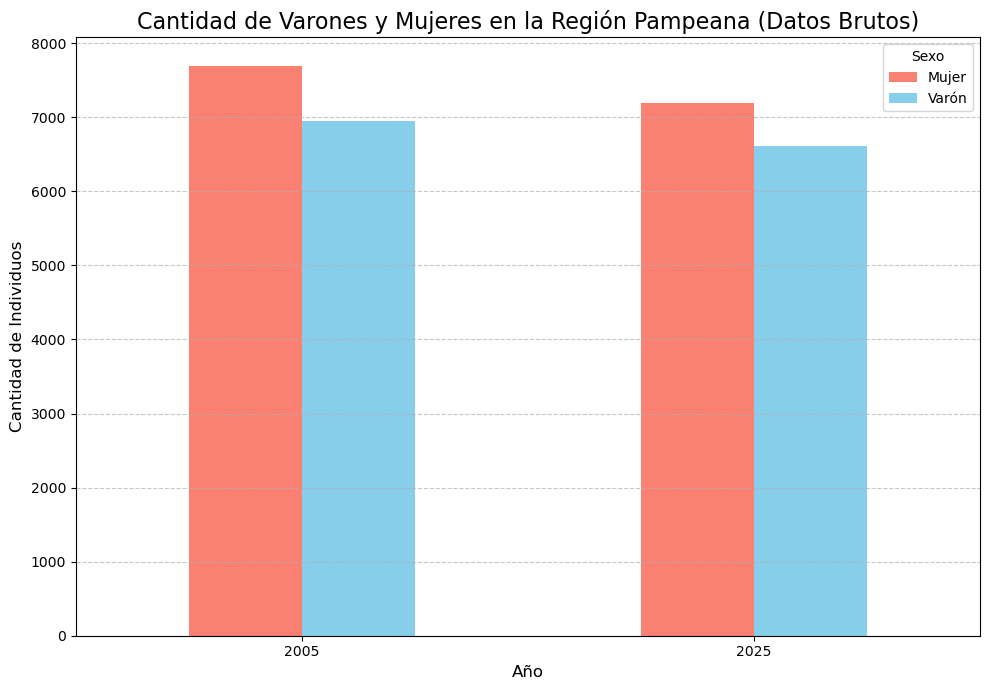

In [50]:
#Homogeneizar valores y limpiar la variable de sexo ---
# Mapear los valores de 2025 a strings
df_limpio["CH04"] = df_limpio["CH04"].replace({1: "Varón", 2: "Mujer"})

# --- 7. Calcular el conteo de mujeres y varones y graficar con la base final ---
# Contar la cantidad de individuos por año y por sexo
conteo_sexo_final = df_limpio.groupby(["ANO4", "CH04"]).size().unstack()

# Definir los colores para el gráfico
colores_sexo = {"Varón": "skyblue", "Mujer": "salmon"}

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 7))
conteo_sexo_final.plot(kind="bar", color=[colores_sexo.get(x, 'gray') for x in conteo_sexo_final.columns], ax=ax)

# Personalizar el gráfico
ax.set_title("Cantidad de Varones y Mujeres en la Región Pampeana (Datos Brutos)", fontsize=16)
ax.set_xlabel("Año", fontsize=12)
ax.set_ylabel("Cantidad de Individuos", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title="Sexo", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Matriz de correlacion

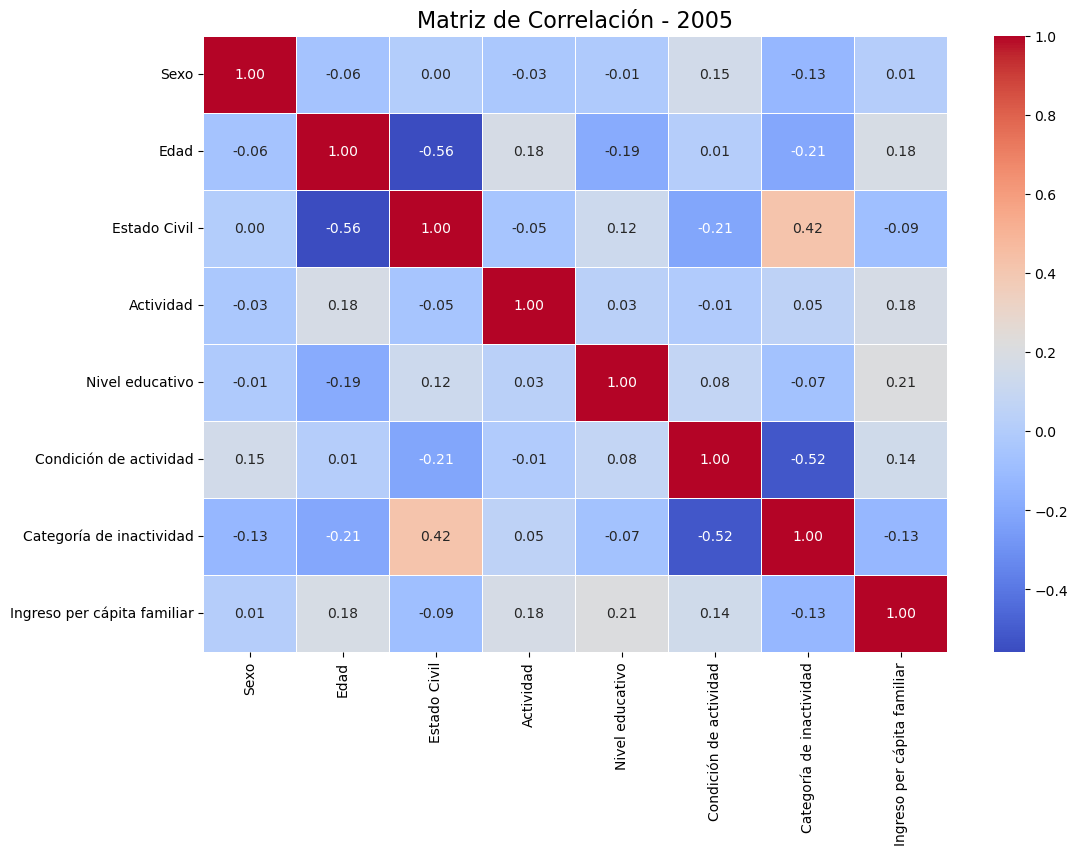

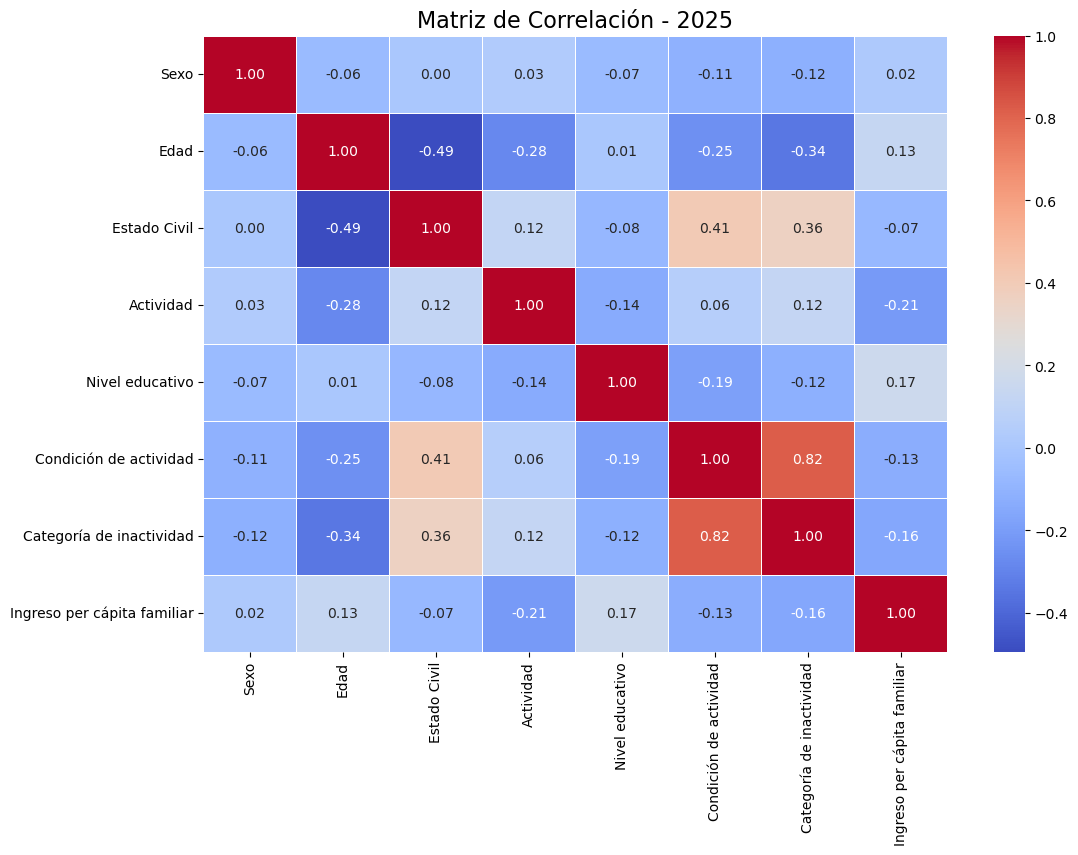

In [51]:
# Diccionario para renombrar las variables
nombres_base = {
    "CH04": "Sexo",
    "CH06": "Edad",
    "CH07": "Estado Civil",
    "CH08": "Actividad",
    "NIVEL_ED": "Nivel educativo",
    "ESTADO": "Condición de actividad",
    "CAT_INAC": "Categoría de inactividad",
    "IPCF": "Ingreso per cápita familiar",
    "ANO4": "Año"  # corregí a ANO4 si en tu base está así, o ANIO si ya venías usando ese
}

# Seleccionamos las columnas de interés
cols_of_interest = list(nombres_base.keys())
df_filtered = df_limpio[cols_of_interest].copy()

# Convertir variables categóricas en códigos numéricos
categorical_cols = ['CH04','CH07','CH08','NIVEL_ED','ESTADO','CAT_INAC']
for col in categorical_cols:
    df_filtered[col] = df_filtered[col].astype("category").cat.codes

# Renombrar columnas
df_filtered = df_filtered.rename(columns=nombres_base)

# Función para calcular y graficar la matriz de correlación por año
def plot_corr_matrix(df, year):
    df_year = df[df['Año'] == year].drop(columns='Año').copy()

    # Sacar columnas sin varianza
    df_year = df_year.loc[:, df_year.nunique() > 1]
    
    # Calcular correlación
    corr_matrix = df_year.corr()

    # Graficar
    plt.figure(figsize=(12,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    plt.title(f"Matriz de Correlación - {year}", fontsize=16)
    plt.show()

# Generar matrices para 2005 y 2025
plot_corr_matrix(df_filtered, 2005)
plot_corr_matrix(df_filtered, 2025)


# PARTE 3: Conociendo a los pobres y no pobres

## Ejercicio 5

In [52]:
# --- 1. ¿Cuántas personas no respondieron su condición de actividad? ---
faltantes_cond_act = df_limpio['ESTADO'].isna().sum()
print(f"Personas que no respondieron su condición de actividad: {faltantes_cond_act}")

# --- 2. Base respondieron (ITF > 0) ---
respondieron = df_limpio[df_limpio['ITF'] > 0].copy()

# --- 3. Base norespondieron (ITF == 0) ---
norespondieron = df_limpio[df_limpio['ITF'] == 0].copy()

# --- 4. Mostrar tamaños ---
print("Cantidad de observaciones en respondieron:", respondieron.shape[0])
print("Cantidad de observaciones en norespondieron:", norespondieron.shape[0])

# (Opcional) guardar en CSV
# respondieron.to_csv("respondieron.csv", index=False)
# norespondieron.to_csv("norespondieron.csv", index=False)

Personas que no respondieron su condición de actividad: 0
Cantidad de observaciones en respondieron: 23821
Cantidad de observaciones en norespondieron: 4463


In [53]:
# --- Crear DataFrames separados ---
df_respondieron = respondieron.copy()
df_norespondieron = norespondieron.copy()

In [54]:
# Si querés ver los primeros registros
df_respondieron

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PONDERA,AGLOMERADO,REGION,CH10,CH09,ITF,PP04G,CH12,CODUSU,ANO4,CH07_txt
0,Varón,28.0,2,No paga ni le descuentan,Primaria Completa,Ocupado,NaN,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Primario,125082,2005,Casado
1,Mujer,30.0,2,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,NaN,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Terciario,125082,2005,Casado
2,Varón,4.0,5,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,280.0,377.0,Gran La Plata,Pampeana,"Sí, asiste",No,840.0,NaN,Jardín/Preescolar,125082,2005,Soltero
3,Varón,66.0,2,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,NaN,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En vehículo para transporte de personas y merc...,Secundario,125283,2005,Casado
4,Mujer,60.0,2,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,NaN,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En un local/oficina/establecimiento/negocio/ta...,Secundario,125283,2005,Casado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,Varón,13.0,5,1.0,3,3,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3.0,TQRMNOPWQHLMKUCDEGJBF00852927,2025,Soltero
28450,Varón,NaN,5,1.0,1,4,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3.0,TQRMNOPWQHLMKUCDEGJBF00852927,2025,Soltero
28451,Varón,24.0,5,1.0,5,1,0,1700000.0,719.0,13,Pampeana,1,1,1700000.0,11.0,7.0,TQRMNOSSVHLMLMCDEGJBF00852929,2025,Soltero
28452,Mujer,41.0,3,1.0,4,1,0,1600000.0,519.0,13,Pampeana,2,1,4800000.0,8.0,5.0,TQRMNOSSXHLMLMCDEGJBF00858297,2025,Separado/Divorciado


In [55]:
df_norespondieron.head()

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PONDERA,AGLOMERADO,REGION,CH10,CH09,ITF,PP04G,CH12,CODUSU,ANO4,CH07_txt
14661,Mujer,51.0,5,2.0,3,1,0,0.0,656.0,4,Pampeana,2,1,0.0,8.0,4.0,TQRMNOSTRHJMLRCDEFKID00875910,2025,Soltero
14662,Varón,28.0,1,1.0,3,1,0,0.0,656.0,4,Pampeana,2,1,0.0,11.0,4.0,TQRMNOSTRHJMLRCDEFKID00875910,2025,Unido
14663,Varón,24.0,5,2.0,5,1,0,0.0,656.0,4,Pampeana,1,1,0.0,11.0,7.0,TQRMNOSTRHJMLRCDEFKID00875910,2025,Soltero
14664,Varón,19.0,5,2.0,5,3,3,0.0,656.0,4,Pampeana,1,1,0.0,NaN,7.0,TQRMNOSTRHJMLRCDEFKID00875910,2025,Soltero
14665,Mujer,49.0,2,1.0,4,1,0,0.0,674.0,13,Pampeana,2,1,0.0,11.0,4.0,TQRMNOSSYHMLKSCDEGJBF00877718,2025,Casado


## Ejercicio 6

In [56]:
def agregar_adulto_equivalente(df_respondieron):
    """
    Agrega la columna 'adulto_equiv' a un DataFrame usando las columnas CH04 (sexo) y CH06 (edad).

    Args:
        df_respondieron (pd.DataFrame): DataFrame con las columnas 'CH04' y 'CH06'.
                                        CH04: 1=Varón, 2=Mujer.
                                        CH06: Edad en años.

    Returns:
        pd.DataFrame: DataFrame con la nueva columna 'adulto_equiv'.
    """

    # Tabla de equivalencias de adulto equivalente
    tabla_adulto_equiv_csv = """
Edad,Mujeres,Varones
Menor de 1 año,0.35,0.35
1 año,0.37,0.37
2 años,0.46,0.46
3 años,0.51,0.51
4 años,0.55,0.55
5 años,0.6,0.6
6 años,0.64,0.64
7 años,0.66,0.66
8 años,0.68,0.68
9 años,0.69,0.69
10 años,0.7,0.79
11 años,0.72,0.82
12 años,0.74,0.85
13 años,0.76,0.9
14 años,0.76,0.96
15 años,0.77,1
16 años,0.77,1.03
17 años,0.77,1.04
18 a 29 años,0.76,1.02
30 a 45 años,0.77,1
46 a 60 años,0.76,1
61 a 75 años,0.67,0.83
más de 75 años,0.63,0.74
"""

    # Leer la tabla de equivalencias desde la cadena de texto
    df_equiv = pd.read_csv(io.StringIO(tabla_adulto_equiv_csv))

    # Definir una función para buscar el valor de adulto equivalente por fila
    def obtener_adulto_equiv(row):
        sexo = row['CH04']
        edad = row['CH06']

        if pd.isna(sexo) or pd.isna(edad):
            return None

        # Convertir el sexo numérico a la etiqueta de la columna
        columna_sexo = 'Varones' if sexo == 1 else 'Mujeres'

        # Asignar rangos de edad
        if edad < 1:
            rango_edad = "Menor de 1 año"
        elif 18 <= edad <= 29:
            rango_edad = "18 a 29 años"
        elif 30 <= edad <= 45:
            rango_edad = "30 a 45 años"
        elif 46 <= edad <= 60:
            rango_edad = "46 a 60 años"
        elif 61 <= edad <= 75:
            rango_edad = "61 a 75 años"
        elif edad > 75:
            rango_edad = "más de 75 años"
        else:
            rango_edad = f"{int(edad)} años"
            
        valor = df_equiv.loc[df_equiv['Edad'] == rango_edad, columna_sexo].values
        return valor[0] if valor.size > 0 else None

    # Aplicar la función a cada fila del DataFrame para crear la nueva columna
    df_respondieron['adulto_equiv'] = df_respondieron.apply(obtener_adulto_equiv, axis=1)

    return df_respondieron

# --- Ejemplo de uso ---
# Suponiendo que ya tienes tu DataFrame 'df_respondieron' cargado
# df_respondieron = pd.read_excel('tu_archivo_de_datos.xlsx') 
# O si es un CSV: 
# df_respondieron = pd.read_csv('tu_archivo_de_datos.csv')



# Llama a la función con tu DataFrame
df_equiv = agregar_adulto_equivalente(df_respondieron)

# Imprime el resultado para verificar
df_equiv

,CH04,CH06,CH07,CH08,NIVEL_ED,ESTADO,CAT_INAC,IPCF,PONDERA,AGLOMERADO,REGION,CH10,CH09,ITF,PP04G,CH12,CODUSU,ANO4,CH07_txt,adulto_equiv
0,Varón,28.0,2,No paga ni le descuentan,Primaria Completa,Ocupado,NaN,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Primario,125082,2005,Casado,0.76
1,Mujer,30.0,2,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,NaN,280.0,377.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,840.0,En un local/oficina/establecimiento/negocio/ta...,Terciario,125082,2005,Casado,0.77
2,Varón,4.0,5,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,Menor de 6 años,280.0,377.0,Gran La Plata,Pampeana,"Sí, asiste",No,840.0,NaN,Jardín/Preescolar,125082,2005,Soltero,0.55
3,Varón,66.0,2,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,NaN,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En vehículo para transporte de personas y merc...,Secundario,125283,2005,Casado,0.67
4,Mujer,60.0,2,Mutual/Prepaga/Servicio de emergencia,Secundaria Incompleta,Ocupado,NaN,1075.0,283.0,Gran La Plata,Pampeana,"No asiste, pero asistió",Sí,4300.0,En un local/oficina/establecimiento/negocio/ta...,Secundario,125283,2005,Casado,0.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,Varón,13.0,5,1.0,3,3,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3.0,TQRMNOPWQHLMKUCDEGJBF00852927,2025,Soltero,0.76
28450,Varón,NaN,5,1.0,1,4,3,616000.0,773.0,13,Pampeana,1,1,3080000.0,NaN,3.0,TQRMNOPWQHLMKUCDEGJBF00852927,2025,Soltero,NaN
28451,Varón,24.0,5,1.0,5,1,0,1700000.0,719.0,13,Pampeana,1,1,1700000.0,11.0,7.0,TQRMNOSSVHLMLMCDEGJBF00852929,2025,Soltero,0.76
28452,Mujer,41.0,3,1.0,4,1,0,1600000.0,519.0,13,Pampeana,2,1,4800000.0,8.0,5.0,TQRMNOSSXHLMLMCDEGJBF00858297,2025,Separado/Divorciado,0.77


In [57]:
# === Calcular adulto equivalente por hogar ===
df_equiv["ad_equiv_hogar"] = (
    df_equiv.groupby("CODUSU")["adulto_equiv"].transform("sum")
)

# Verificamos
df_equiv[["CODUSU", "adulto_equiv", "ad_equiv_hogar"]]


,CODUSU,adulto_equiv,ad_equiv_hogar
0,125082,0.76,2.08
1,125082,0.77,2.08
2,125082,0.55,2.08
3,125283,0.67,2.95
4,125283,0.76,2.95
...,...,...,...
28449,TQRMNOPWQHLMKUCDEGJBF00852927,0.76,2.93
28450,TQRMNOPWQHLMKUCDEGJBF00852927,NaN,2.93
28451,TQRMNOSSVHLMLMCDEGJBF00852929,0.76,0.76
28452,TQRMNOSSXHLMLMCDEGJBF00858297,0.77,2.30


## Ejercicio 7

In [58]:
# Definimos los valores de la CBT
cbt_valores = {
    2005: 205.07,
    2025: 365177
}

# Creamos la columna ingreso_necesario
df_equiv["ingreso_necesario"] = np.where(
    df_equiv["ANO4"] == 2005,
    df_equiv["ad_equiv_hogar"] * 205.07,
    df_equiv["ad_equiv_hogar"] * 365177
)

# Verificamos
df_equiv[["ANO4", "CODUSU", "ad_equiv_hogar", "ingreso_necesario"]]


,ANO4,CODUSU,ad_equiv_hogar,ingreso_necesario
0,2005,125082,2.08,4.265456e+02
1,2005,125082,2.08,4.265456e+02
2,2005,125082,2.08,4.265456e+02
3,2005,125283,2.95,6.049565e+02
4,2005,125283,2.95,6.049565e+02
...,...,...,...,...
28449,2025,TQRMNOPWQHLMKUCDEGJBF00852927,2.93,1.069969e+06
28450,2025,TQRMNOPWQHLMKUCDEGJBF00852927,2.93,1.069969e+06
28451,2025,TQRMNOSSVHLMLMCDEGJBF00852929,0.76,2.775345e+05
28452,2025,TQRMNOSSXHLMLMCDEGJBF00858297,2.30,8.399071e+05


## Ejercicio 8

In [59]:
# Creamos la variable pobre en df_equiv
df_equiv["pobre"] = (df_equiv["ITF"] < df_equiv["ingreso_necesario"]).astype(int)

# Cantidad de pobres por año
pobres_por_anio = df_equiv.groupby("ANO4")["pobre"].sum()

# Total de hogares/personas por año
total_por_anio = df_equiv.groupby("ANO4")["pobre"].count()

# Porcentaje de pobres por año
porcentaje_pobres = (pobres_por_anio / total_por_anio) * 100

# Mostramos resultados
print("Cantidad de pobres por año:")
print(pobres_por_anio)
print("\nPorcentaje de pobres sobre la muestra:")
print(porcentaje_pobres)


Cantidad de pobres por año:
ANO4
2005    3592
2025    2656
Name: pobre, dtype: int64

Porcentaje de pobres sobre la muestra:
ANO4
2005    24.804917
2025    28.436831
Name: pobre, dtype: float64


## Ejercicio 9

Tabla descriptiva de pobreza (2005 vs 2025):
   ANO4  total_pobres  total_muestra  porcentaje_pobres
0  2005          3592          14481          24.804917
1  2025          2656           9340          28.436831


/var/folders/hr/svz3x36x7d59_8fxxvxg3p9c0000gn/T/ipykernel_42160/2125283651.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tabla_desc, x="ANO4", y="porcentaje_pobres", palette="viridis")


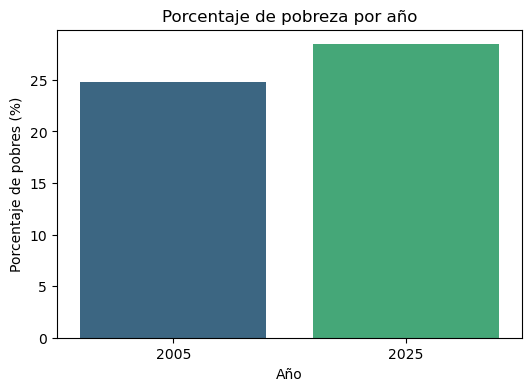

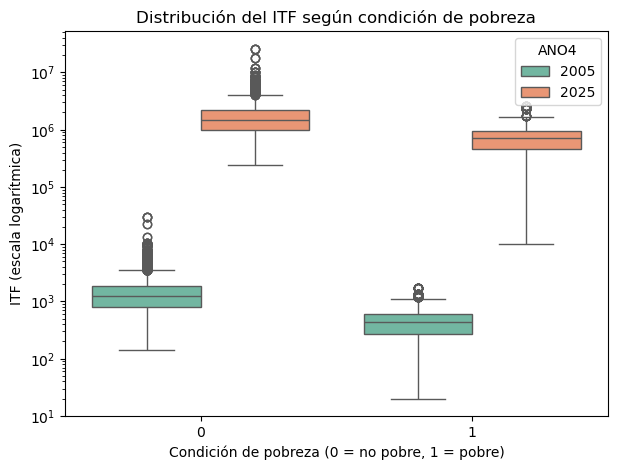

In [60]:
# --- 1. Estadísticas descriptivas ---
tabla_desc = df_equiv.groupby("ANO4")["pobre"].agg(
    total_pobres = "sum",
    total_muestra = "count",
    porcentaje_pobres = lambda x: x.mean() * 100
).reset_index()

print("Tabla descriptiva de pobreza (2005 vs 2025):")
print(tabla_desc)

# --- 2. Gráficos exploratorios ---

# Gráfico 1: barras comparando porcentaje de pobres
plt.figure(figsize=(6,4))
sns.barplot(data=tabla_desc, x="ANO4", y="porcentaje_pobres", palette="viridis")
plt.title("Porcentaje de pobreza por año")
plt.ylabel("Porcentaje de pobres (%)")
plt.xlabel("Año")
plt.show()

# Gráfico 2: distribución de ingresos según pobreza
plt.figure(figsize=(7,5))
sns.boxplot(data=df_equiv, x="pobre", y="ITF", hue="ANO4", palette="Set2")
plt.yscale("log")  # para ver mejor si hay valores extremos
plt.title("Distribución del ITF según condición de pobreza")
plt.xlabel("Condición de pobreza (0 = no pobre, 1 = pobre)")
plt.ylabel("ITF (escala logarítmica)")
plt.show()
